# Feature Selection with Scikit-Learn Library

## Feature Selection Based on Variance

Features having constant or very similar values do not really play any significant role in machine learning tasks, such as
classification and regression (mulitcollinearity). Therefore, features that are very similar should be removed from the dataset.

In [1]:
import pandas as pd
import numpy as np

# importing the dataset
wine_data = pd.read_csv("Data/winequality-red.csv", sep =";" )

#printing dataset header
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# dividing data into features and labels
features = wine_data.drop(["quality"], axis = 1)#1 for dropping columns
labels = wine_data.filter(["quality"], axis = 1)

In [3]:
#printing variance
features.var()# Variance shows how far a set of data is spread out

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
dtype: float64

In [4]:
# filtering features based on threshold

from sklearn.feature_selection import VarianceThreshold

var_sel = VarianceThreshold(threshold=(0.1))#  filter all the features with a variance value of 0.1
var_sel.fit(features)

VarianceThreshold(threshold=0.1)

In [5]:
attributes_to_retain = features.columns[var_sel.get_support()]
attributes_to_retain

Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')

In [6]:
attributes_to_filter = [attr for attr in features.columns if attr not in features.columns[var_sel.get_support()]]
attributes_to_filter

['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates']

In [7]:
filtered_dataset = features.drop(attributes_to_filter, axis = 1)
filtered_dataset.head()

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,alcohol
0,7.4,1.9,11.0,34.0,9.4
1,7.8,2.6,25.0,67.0,9.8
2,7.8,2.3,15.0,54.0,9.8
3,11.2,1.9,17.0,60.0,9.8
4,7.4,1.9,11.0,34.0,9.4


## Feature Selection Based on Correlation

In feature selection based on correlation, the features are selected using the following steps:
1. Mutual correlation between all the features is calculated.
2. The correlation threshold is set.
3. Features having mutual correlation greater than the correlation threshold with any other feature are removed from the dataset.

In [8]:
#printing correlation
correlation_matrix = features.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [9]:
sns.pairplot(correlation_matrix)

NameError: name 'sns' is not defined

<Axes: >

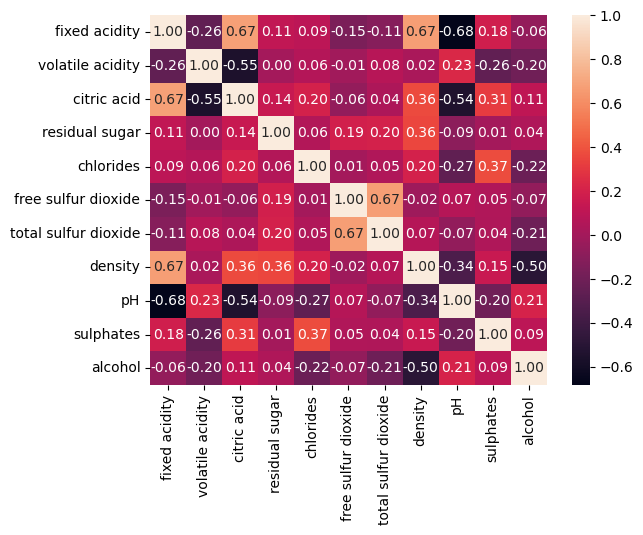

In [10]:
#displaying seaborn heatmap for correlation
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')

To find all the correlated features, you can iterate through the rows in the feature correlation matrix and then select the features that have a correlation higher than a certain threshold. For example, in the following script, all the features with an absolute correlation higher than 0.6 are selected and added to the correlated feature matrix set.

In [11]:
#creating a correlation matrix for features

correlated_features_matrix = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            corr_col = correlation_matrix.columns[i]
            correlated_features_matrix.add(corr_col)

In [12]:
len(correlated_features_matrix)

4

In [13]:
print(correlated_features_matrix)

{'pH', 'citric acid', 'density', 'total sulfur dioxide'}


In [14]:
filtered_dataset = features.drop(correlated_features_matrix, axis = 1)
filtered_dataset.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol
0,7.4,0.70,1.9,0.076,11.0,0.56,9.4
1,7.8,0.88,2.6,0.098,25.0,0.68,9.8
2,7.8,0.76,2.3,0.092,15.0,0.65,9.8
3,11.2,0.28,1.9,0.075,17.0,0.58,9.8
4,7.4,0.70,1.9,0.076,11.0,0.56,9.4


## 4.3. Features Selection Based on Recursive Elimination

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# feature selection using RFE
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=4, step=1)
rfe.fit(features, labels)

In [ ]:
rfe.ranking_


In [ ]:
attributes_to_retain =  rfe.get_support(1)
attributes_to_retain

In [ ]:
filtered_dataset = features[features.columns[attributes_to_retain]]
filtered_dataset.head()

## 4.4. Features Selection Based on Model Performance

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# selecting features based on the performance of RandomForest
rfr = RandomForestRegressor()
rfr.fit(features, labels)



In [ ]:
model = SelectFromModel(rfr, prefit=True, threshold='mean')
X_transformed = model.transform(features)

In [ ]:
#retrieving selected features
cols = model.get_support(indices=True)


In [ ]:
#printing dataset with selected features
filtered_dataset = features[features.columns[cols]]
filtered_dataset.head()

## Exercise 4.1


### Question 1

Which of the following feature types should you retain in the dataset?

A- Features with low Variance \
B- Features with high Variance \
C- Features with high standard deviation \
D- Both B and C

Answer: D
    
    
### Question 2

Which of the following features you should remove from the dataset?

A- Features with high mutual correlation \
B- Features with low mutual correlation \
C- Features with high correlation with output label \
D- None of the above

Answer: A


### Question 3

Which of the following feature selection method does not depend upon the output label?

A- Feature selection based on Model performance \
B- Feature selection based on recursive elimination \
C- Feature selection based on mutual feature variance \
D- All of the above

Answer: C

## Exercise 4.2

Using the `winequalit-white` dataset from the `Dataset and Source Codes` folder, apply recursive elimination technique for feature selection.

**Solution:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import pandas as pd

# importing the dataset
wine_data = pd.read_csv("E:/Datasets/winequality-white.csv", sep =";" )

#printing dataset header
wine_data.head()

# dividing data into features and labels
features = wine_data.drop(["quality"], axis = 1)
labels = wine_data.filter(["quality"], axis = 1)

# feature selection using RFE
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=4, step=1)
rfe.fit(features, labels)

attributes_to_retain =  rfe.get_support(1)

filtered_dataset = features[features.columns[attributes_to_retain]]
filtered_dataset.head()